In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns



2023-07-26 01:52:08.331596: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
vueltas = pd.read_csv("../dataset_todos_pilotos/final/laps_spain_final_v2.csv")


In [4]:
vueltas['makeStop'] = vueltas['makeStop'].shift(1)   
vueltas['makeStop'][0] = 0

/var/folders/pd/wpkltt694qx207z03w_cmlbh0000gn/T/ipykernel_80591/1494221414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vueltas['makeStop'][0] = 0


In [5]:
vueltas[0:30]

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,Piloto,makeStop,AirTemp,Rainfall,...,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,anyo,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
0,132.826,3.0,4.0,0,4,1.0,hamilton,0.0,16.3,1,...,1.0,134.646,133.906,1.0,2018,25.0,0,0,1,0
1,128.778,4.0,5.0,0,4,1.0,hamilton,0.0,15.9,1,...,1.0,133.632,128.681,1.0,2018,25.0,0,0,1,0
2,130.044,5.0,6.0,0,4,1.0,hamilton,0.0,16.1,1,...,1.0,127.041,129.827,1.0,2018,25.0,0,0,1,0
3,133.088,6.0,7.0,0,4,1.0,hamilton,0.0,16.7,0,...,1.0,119.521,133.232,1.0,2018,25.0,0,0,1,0
4,82.099,7.0,8.0,0,1,1.0,hamilton,0.0,16.4,0,...,1.0,90.479,83.604,1.0,2018,25.0,0,0,1,0
5,81.631,8.0,9.0,0,1,1.0,hamilton,0.0,16.3,0,...,1.0,86.554,82.259,1.0,2018,25.0,0,0,1,0
6,81.386,9.0,10.0,0,1,1.0,hamilton,0.0,16.3,1,...,1.0,85.665,82.475,1.0,2018,25.0,0,0,1,0
7,81.079,10.0,11.0,0,1,1.0,hamilton,0.0,16.2,1,...,1.0,85.523,82.536,1.0,2018,25.0,0,0,1,0
8,81.808,11.0,12.0,0,1,1.0,hamilton,0.0,16.4,1,...,1.0,85.151,82.003,1.0,2018,25.0,0,0,1,0
9,81.081,12.0,13.0,0,1,1.0,hamilton,0.0,16.6,1,...,1.0,84.969,82.875,1.0,2018,25.0,0,0,1,0


In [478]:
columnas = ["Stint", "Piloto", 'anyo', 'makeStop']
vueltas = vueltas[columnas]

In [6]:

#vueltas = vueltas.drop(['Piloto'], axis = 1)

vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020, 2021])]
#vueltas_validation = vueltas[vueltas['anyo'].isin([2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

vueltas_train = vueltas_train[vueltas_train['Piloto'] == "max_verstappen"]
#vueltas_validation = vueltas_validation[vueltas_validation['Piloto'] == "max_verstappen"]
vueltas_test = vueltas_test[vueltas_test['Piloto'] == "max_verstappen"]

#vueltas_train = vueltas_train.drop(['anyo'], axis=1)
#vueltas_validation = vueltas_validation.drop(['anyo'], axis=1)

vueltas_test = vueltas_test.drop(['anyo'], axis=1)
vueltas_train.drop(['Piloto'], axis = 1, inplace = True)
vueltas_test.drop(['Piloto'], axis = 1, inplace = True)
#vueltas_validation.drop(['Piloto'], axis = 1, inplace = True)
vueltas_train = vueltas_train.drop(['Stint'], axis=1)
#vueltas_validation = vueltas_validation.drop(['Stint'], axis=1)
vueltas_test = vueltas_test.drop(['Stint'], axis=1)

vueltas_train = vueltas_train.astype('float')
#vueltas_validation = vueltas_validation.astype(float)
vueltas_test = vueltas_test.astype(float)

In [7]:
vueltas_train_18 = vueltas_train[vueltas_train['anyo'] == 2018]

vueltas_train_18 = vueltas_train_18.drop('anyo', axis=1)
vueltas_train_18['makeStop'] = vueltas_train_18['makeStop'].astype('int32')
scaler = MinMaxScaler()
scaler.fit(vueltas_train_18)
vueltas_train_scaler_18= scaler.transform(vueltas_train_18)

In [8]:
vueltas_train_19 = vueltas_train[vueltas_train['anyo'] == 2019]

vueltas_train_19 = vueltas_train_19.drop('anyo', axis=1)
vueltas_train_19['makeStop'] = vueltas_train_19['makeStop'].astype('int32')

scaler.fit(vueltas_train_19)
vueltas_train_scaler_19= scaler.transform(vueltas_train_19)

In [9]:
vueltas_train_20 = vueltas_train[vueltas_train['anyo'] == 2020]

vueltas_train_20 = vueltas_train_20.drop('anyo', axis=1)
vueltas_train_20['makeStop'] = vueltas_train_20['makeStop'].astype('int32')

scaler.fit(vueltas_train_20)
vueltas_train_scaler_20= scaler.transform(vueltas_train_20)

In [10]:
vueltas_train_21 = vueltas_train[vueltas_train['anyo'] == 2021]

vueltas_train_21 = vueltas_train_21.drop('anyo', axis=1)
vueltas_train_21['makeStop'] = vueltas_train_21['makeStop'].astype('int32')

scaler.fit(vueltas_train_21)
vueltas_train_scaler_21= scaler.transform(vueltas_train_21)



In [11]:
vueltas_test_scaler = scaler.transform(vueltas_test)
#vueltas_validation_scaler = scaler.transform(vueltas_validation)


In [12]:
trainX = []
trainY = []
testX = []
testY = []
validationX = []
validationY = []
loopback = 8 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler_18) -future +1):
    trainX.append(vueltas_train_scaler_18[i-loopback:i, 0:vueltas_train_18.shape[1]])
    trainY.append(vueltas_train_scaler_18[i + future - 1:i + future,5])
    
for i in range (loopback, len(vueltas_train_scaler_19) -future +1):
    trainX.append(vueltas_train_scaler_19[i-loopback:i, 0:vueltas_train_19.shape[1]])
    trainY.append(vueltas_train_scaler_19[i + future - 1:i + future,5])
    
for i in range (loopback, len(vueltas_train_scaler_20) -future +1):
    trainX.append(vueltas_train_scaler_20[i-loopback:i, 0:vueltas_train_20.shape[1]])
    trainY.append(vueltas_train_scaler_20[i + future - 1:i + future,5])
    
for i in range (loopback, len(vueltas_train_scaler_21) -future +1):
    trainX.append(vueltas_train_scaler_21[i-loopback:i, 0:vueltas_train_21.shape[1]])
    trainY.append(vueltas_train_scaler_21[i + future - 1:i + future,5])
 
for i in range (loopback, len(vueltas_test_scaler) -future +1):
        testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
        testY.append(vueltas_test_scaler[i + future - 1:i + future,5])
        
    
#for i in range (loopback, len(vueltas_validation_scaler) -future +1):
 #   validationX.append(vueltas_validation_scaler[i-loopback:i, 0:vueltas_validation.shape[1]])
  #  validationY.append(vueltas_validation_scaler[i + future - 1:i + future,5])

In [13]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [14]:
vueltas_train_21

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,makeStop,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
3107,83.561,2.0,5.0,0.0,1.0,0,21.7,0.0,58.0,31.6,1.0,88.311,83.798,2.0,24.0,0.0,0.0,1.0,0.0
3108,83.025,3.0,6.0,0.0,1.0,0,21.7,0.0,57.9,31.8,1.0,87.309,83.425,2.0,24.0,0.0,0.0,1.0,0.0
3109,83.209,4.0,7.0,0.0,1.0,0,21.8,0.0,58.0,31.7,1.0,86.368,82.938,2.0,24.0,0.0,0.0,1.0,0.0
3110,83.206,5.0,8.0,0.0,1.0,0,21.8,0.0,57.9,31.6,1.0,86.945,83.118,2.0,24.0,0.0,0.0,1.0,0.0
3111,83.227,6.0,9.0,0.0,1.0,0,21.8,0.0,58.4,31.0,1.0,86.904,83.062,2.0,24.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,101.338,61.0,1.0,1.0,1.0,1,23.1,0.0,56.3,35.8,2.0,81.107,83.695,2.0,66.0,0.0,0.0,1.0,0.0
3167,78.149,62.0,2.0,1.0,1.0,0,23.1,0.0,57.0,35.8,2.0,81.636,81.331,2.0,66.0,0.0,0.0,1.0,0.0
3168,80.216,63.0,3.0,1.0,1.0,0,23.2,0.0,57.3,36.1,2.0,81.705,80.619,2.0,66.0,0.0,0.0,1.0,0.0
3169,79.619,64.0,4.0,1.0,1.0,0,23.2,0.0,56.7,35.9,2.0,81.708,80.632,2.0,66.0,0.0,0.0,1.0,0.0


In [15]:
trainX.shape[0]

223

In [16]:
trainX.shape

(223, 8, 19)

In [17]:
model = Sequential()
model.add(LSTM(256, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss= "binary_crossentropy") ##Cambiar esto para la siguiente reunion (positivo 1, negativo 0)
model.summary()

2023-07-26 01:53:07.051575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-26 01:53:07.054943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-26 01:53:07.056835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 256)            282624    
                                                                 
 dropout (Dropout)           (None, 8, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 479,873
Trainable params: 479,873
Non-trainable params: 0
_________________________________________________________________


2023-07-26 01:53:07.265132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-26 01:53:07.266413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-26 01:53:07.268143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/15


2023-07-26 01:53:12.631768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-26 01:53:12.633002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-26 01:53:12.634731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - ETA: 0s - loss: 0.6307

2023-07-26 01:53:16.500622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-26 01:53:16.502902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-26 01:53:16.505526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 5s 490ms/step - loss: 0.6307 - val_loss: 0.3521
Epoch 2/15
3/3 [==============================] - 0s 66ms/step - loss: 0.2596 - val_loss: 0.1830
Epoch 3/15
3/3 [==============================] - 0s 65ms/step - loss: 0.1550 - val_loss: 0.2523
Epoch 4/15
3/3 [==============================] - 0s 57ms/step - loss: 0.1634 - val_loss: 0.2585
Epoch 5/15
3/3 [==============================] - 0s 53ms/step - loss: 0.1619 - val_loss: 0.2239
Epoch 6/15
3/3 [==============================] - 0s 59ms/step - loss: 0.1477 - val_loss: 0.1900
Epoch 7/15
3/3 [==============================] - 0s 63ms/step - loss: 0.1333 - val_loss: 0.1749
Epoch 8/15
3/3 [==============================] - 0s 56ms/step - loss: 0.1338 - val_loss: 0.1727
Epoch 9/15
3/3 [==============================] - 0s 53ms/step - loss: 0.1312 - val_loss: 0.1723
Epoch 10/15
3/3 [==============================] - 0s 57ms/step - loss: 0.1296 - val_loss: 0.1742
Epoch 11/15
3/3 [======================

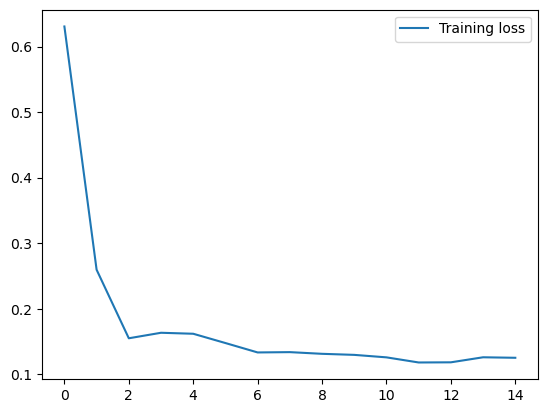

In [18]:
history = model.fit(trainX, trainY, epochs=15, batch_size=64, validation_split=0.2, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [83]:
predictions = model.predict(testX)

2/2 [==============================] - 0s 9ms/step


In [84]:
predictions

array([[0.21934001],
       [0.21031584],
       [0.19877289],
       [0.18740657],
       [0.17350306],
       [0.14900546],
       [0.12447198],
       [0.10229475],
       [0.09499758],
       [0.08749556],
       [0.07558721],
       [0.06492485],
       [0.0592193 ],
       [0.07127506],
       [0.07507329],
       [0.07848135],
       [0.08274195],
       [0.08364502],
       [0.08292346],
       [0.08183221],
       [0.08001388],
       [0.07854589],
       [0.07822618],
       [0.07797012],
       [0.07773687],
       [0.07754051],
       [0.07288361],
       [0.07269594],
       [0.08392383],
       [0.09131996],
       [0.095602  ],
       [0.10088113],
       [0.10776862],
       [0.11622967],
       [0.13168676],
       [0.13606437],
       [0.13443412],
       [0.12219709],
       [0.10568658],
       [0.0916029 ],
       [0.07854848],
       [0.06574576],
       [0.05468889],
       [0.04926541],
       [0.05517033],
       [0.05790868],
       [0.06025361],
       [0.062

In [85]:
import numpy as np
from sklearn.metrics import roc_curve


# Etiquetas reales (0 o 1 según la clase verdadera)
true_labels = testY

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Encontramos el umbral que maximiza la suma de sensibilidad y especificidad
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold = int(optimal_threshold * 100) / 100

print("El umbral óptimo según la curva ROC es:", optimal_threshold)



El umbral óptimo según la curva ROC es: 0.13


In [86]:
predictions[predictions>optimal_threshold] =1.0

In [87]:
predictions[predictions<=optimal_threshold] = 0.0

In [88]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
metricas = classification_report(testY, predictions)
print(metricas)


              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92        53
         1.0       0.22      0.67      0.33         3

    accuracy                           0.86        56
   macro avg       0.60      0.77      0.63        56
weighted avg       0.94      0.86      0.89        56



In [90]:
def calculate_accuracy_within_range(real_values, predicted_values, within_range=3):
    # Convertimos las matrices a listas de 1s y 0s
    real_values = np.ravel(real_values).astype(int)
    predicted_values = np.ravel(predicted_values).astype(int)

    # Encontrar índices donde se hizo una parada
    stop_indexes = np.where(real_values == 1)[0]

    # Crear una lista para almacenar las vueltas acertadas o dentro del rango
    correct_laps = []

    # Verificar si las predicciones coinciden dentro del rango de vueltas
    for stop_index in stop_indexes:
        start_index = max(0, stop_index - within_range + 1)
        #Esto lo hago para que no se me pase de la ultima vuelta
        end_index = min(len(predicted_values), stop_index + within_range) 

        if 1 in predicted_values[start_index:end_index + 1]:
            correct_laps.append(stop_index+1)

    precision = len(correct_laps) / len(stop_indexes) if len(stop_indexes) > 0 else 0

    return precision, correct_laps


In [91]:
accuracy, correct_laps = calculate_accuracy_within_range(testY, predictions, within_range=3)
print(f"Exactitud dentro del rango de vueltas: {accuracy:.2f}")
print(f"Vueltas en las que se ha acertado la parada o está dentro del rango: {correct_laps}")

Exactitud dentro del rango de vueltas: 0.67
Vueltas en las que se ha acertado la parada o está dentro del rango: [5, 36]


In [92]:
precision = accuracy  # En este caso, la precisión es igual a la exactitud dentro del rango
recall = 1.0  # Recall es 1.0, ya que solo estamos considerando las paradas reales dentro del rango
f1_score = 2 * (precision * recall) / (precision + recall)  # Calculamos el F1-score

print(f"Precisión: {precision:.2f}")
print(f"F1-score: {f1_score:.2f}")

Precisión: 0.67
F1-score: 0.80


In [546]:
clases = np.unique(validationY[:,0]) 
clases

TypeError: list indices must be integers or slices, not tuple

In [440]:
f = lambda x: np.argwhere(x == clases)
f = np.vectorize(f)
y_real = f(validationY[:,0])

In [441]:
validationY[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])

In [442]:
y_real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [443]:
#AQUI ES CON LOS DATOS DE VALIDADACION
predictions = model.predict(validationX)

2/2 [==============================] - 0s 9ms/step


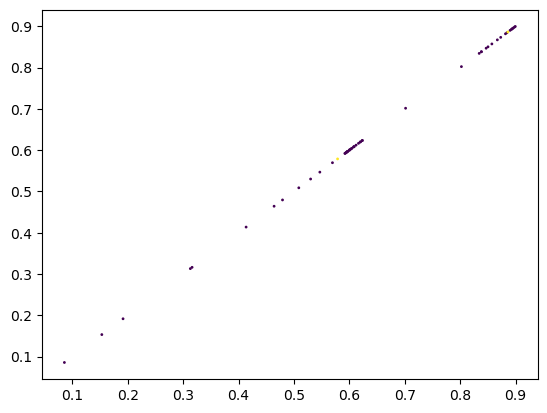

In [444]:
plt.scatter(predictions[:,0], predictions[:,0], s=1, c=y_real+1)

In [445]:
y_real_train = f(trainY[:,0])


In [446]:
y_real_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [447]:
predictions_test = model.predict(testX)

2/2 [==============================] - 0s 12ms/step


In [448]:
y_real_test =  f(testY[:,0])

In [449]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(predictions, y_real, test_size=0.3, stratify=y_real)

In [450]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression(random_state=0, penalty=None).fit(predictions, y_real) # Esto es de validacion

In [451]:
pred_test_2 = rl.predict(predictions_test)

In [452]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_real_test, pred_test_2)
metricas = classification_report(y_real_test, pred_test_2)

/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sergio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [453]:
pred_test_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [454]:
print(cm)
print(metricas)

[[53  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.00      0.00      0.00         3

    accuracy                           0.95        56
   macro avg       0.47      0.50      0.49        56
weighted avg       0.90      0.95      0.92        56

